In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import axion_mass

log10_chi0 = 3.159516e+01 +/- 2.298768e-02
T1 = 1.426080e+08 +/- 1.551611e+06
T2 = 4.592993e+08 +/- 2.987473e+08
p1 = 7.873303e+00 +/- 4.130952e-02
p2 = 1.214561e+01 +/- 4.268871e+00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


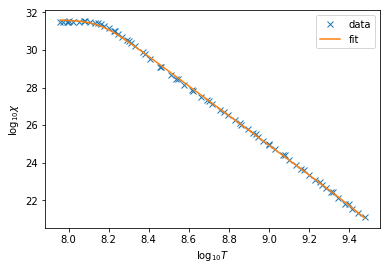

In [90]:
logT = np.log10(axion_mass.T_data)
logchi = np.log10(axion_mass.chi_data)
plt.plot(logT, logchi, "x", label="data")
def f(logT, log_chi0, T1, T2, p1, p2):
    T = 10**logT
    return log_chi0 - np.log10((1 + (T / T1)**p1 + (T / T2)**p2))
params, cov = opt.curve_fit(f, logT, logchi, p0=[30, 2e8, 2e9, 2, 8])
plt.plot(logT, f(logT, *params), label="fit")
err = np.diag(cov)**0.5
names = ["log10_chi0", "T1", "T2", "p1", "p2"]
for name, p, p_err in zip(names, params, err):
    print(name, "=", "%e" % p, "+/-", "%e" % p_err)
plt.xlabel(r"$\log_{10} T$")
plt.ylabel("$\log_{10} \chi$")
plt.legend()

In [76]:
def chi_fit(T):
    return 10**f(np.log10(T), *params)

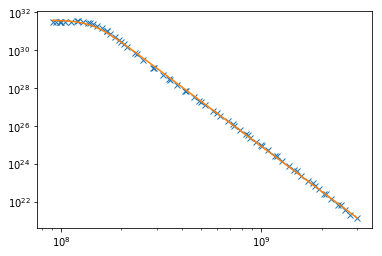

In [77]:
plt.loglog(axion_mass.T_data, axion_mass.chi_data, "x")
plt.loglog(axion_mass.T_data, chi_fit(axion_mass.T_data))

In [79]:
opt.curve_fit?